In [5]:
#   Filip Przychodni
#   Lista 2

In [6]:
#   Importowanie bibliotek
from IPython.display import Image
from IPython.core.display import HTML
import numpy as np
import random
from scipy.integrate import RK45
import matplotlib.pyplot as plt

In [7]:
#  Zadanie 1
Image(url= "https://raw.githubusercontent.com/VGFP/Stochastic-modeling/master/List2_images/Zadanie1_tresc.png")

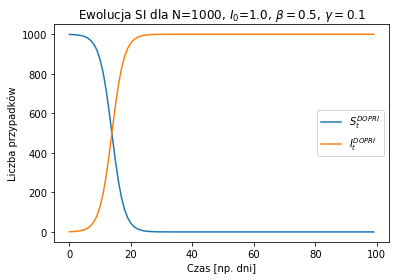

In [8]:
# Podpunkt (a) model SI
def SI(t, y, params):
    beta, gamma, N = params
    S0, I0 = y
    S1 = -beta * I0 * S0 / N
    I1 = beta * I0 * S0 / N
    return [S1, I1]

# parametry
beta = .5
gamma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)

T_ode = np.zeros(steps)
Y = np.zeros((steps, 2))
Y[0, :] = [N - 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SI(t, y, [beta, gamma, N]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S = Y[:, 0]
I = Y[:, 1]
R = N - S - I

plt.plot(T_ode, S, label=r'$S_t^{DOPRI}$')
plt.plot(T_ode, I, label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.title(f'Ewolucja SI dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$')
plt.legend()
# plt.savefig('SI.png', dpi=300)
plt.show()

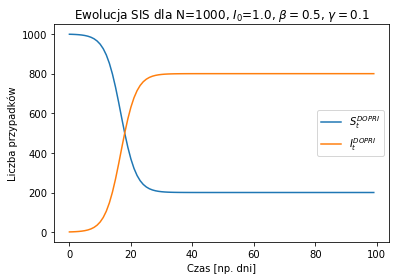

In [9]:
# Podpunkt (b) model SIS

def SIS(t, y, params):
    beta, gamma, N = params
    S0, I0 = y
    S1 = -beta * I0 * S0 / N + gamma * I0
    I1 = beta * I0 * S0 / N - gamma * I0
    return [S1, I1]

# parametry
beta = .5
gamma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)

T_ode = np.zeros(steps)
Y = np.zeros((steps, 2))
Y[0, :] = [N - 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SIS(t, y, [beta, gamma, N]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S = Y[:, 0]
I = Y[:, 1]
R = N - S - I

plt.plot(T_ode, S, label=r'$S_t^{DOPRI}$')
plt.plot(T_ode, I, label=r'$I_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.title(f'Ewolucja SIS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$')
plt.legend()
# plt.savefig('SIS.png', dpi=300)
plt.show()

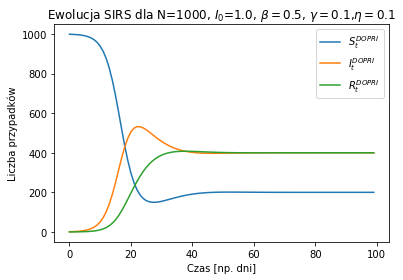

In [10]:
# Podpunkt (c) model SIRS

def SIRS(t, y, params):
    beta, gamma, N, eta = params
    S0, I0, R0 = y
    S1 = -beta * I0 * S0 / N + eta * R0
    I1 = beta * I0 * S0 / N - gamma * I0
    R1 = gamma * I0 - eta * R0
    return [S1, I1, R1]

# parametry
beta = .5
gamma = .1
eta = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 3))
Y[0, :] = [N - 1, 1, 0] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SIRS(t, y, [beta, gamma, N, eta]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S = Y[:, 0]
I = Y[:, 1]
R = Y[:, 2] 

plt.plot(T_ode, S, label=r'$S_t^{DOPRI}$')
plt.plot(T_ode, I, label=r'$I_t^{DOPRI}$')
plt.plot(T_ode, R, label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.title(f'Ewolucja SIRS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\eta = ' + f'{eta}$')
plt.legend()
# plt.savefig('SIR.png', dpi=300)
plt.show()

[[814.34415861  47.57157453  41.87434053  98.20992633]
 [794.16683573  52.86278608  46.89224377 108.07813442]
 [772.35372623  58.61972813  52.46242778 118.56411786]
 [748.8914961   64.85479279  58.63213411 129.621577  ]
 [723.79423947  71.57375417  65.44952524 141.18248112]]


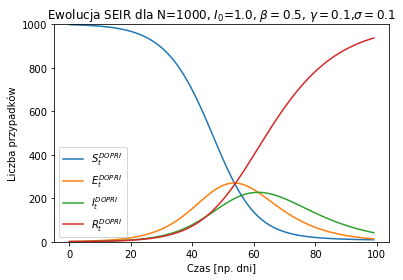

In [44]:
# Podpunkt (d) model SEIR

def SEIR(t, y, params):
    beta, gamma, N, sigma = params
    S0, I0, R0, E0 = y
    S1 = -beta * I0 * S0 / N
    E1 = beta * I0 * S0 / N - sigma * E0
    I1 = sigma * E0 - gamma * I0
    R1 = gamma * I0
    return [S1, I1, R1, E1]

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 4))
Y[0, :] = [N-1, 1, 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SEIR(t, y, [beta, gamma, N, sigma]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S = Y[:, 0]
I = Y[:, 1]
R = Y[:, 2]
E = Y[:, 3] 

plt.plot(T_ode, S, label=r'$S_t^{DOPRI}$')
plt.plot(T_ode, E, label=r'$E_t^{DOPRI}$')
plt.plot(T_ode, I, label=r'$I_t^{DOPRI}$')
plt.plot(T_ode, R, label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
plt.ylim([0,1000])

print(Y[35:40,:])
plt.title(f'Ewolucja SEIR dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\sigma = ' + f'{sigma}$')
plt.legend()
# plt.savefig('SIR.png', dpi=300)
plt.show()

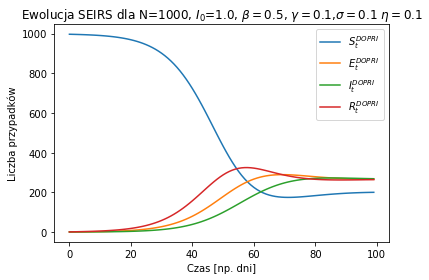

In [43]:
# Podpunkt (e) model SEIRS
def SEIRS(t, y, params):
    beta, gamma, N, sigma, eta = params
    S0, I0, R0, E0 = y
    S1 = -beta * I0 * S0 / N  + eta * R0
    E1 = beta * I0 * S0 / N - sigma * E0
    I1 = sigma * E0 - gamma * I0
    R1 = gamma * I0  - eta * R0
    return [S1, I1, R1, E1]

# parametry
beta = .5
gamma = .1
eta = .1
sigma = .1
N = 1000
T = 100
dt = 1 # krok czasowy na wykresie - nie ma wpływu na dokładność rozwiązania  
steps = int(T / dt)
T_ode = np.zeros(steps)
Y = np.zeros((steps, 4))
Y[0, :] = [N - 3, 1, 1, 1] # [S_0, I_0]
for T in range(steps-1):
    ode_system = RK45(lambda t, y: SEIRS(t, y, [beta, gamma, N, sigma, eta]), T_ode[T], Y[T, :], T_ode[T]+dt)
    while ode_system.status == 'running':
        ode_system.step()
    Y[T + 1, :] = ode_system.y
    T_ode[T + 1] = ode_system.t

S = Y[:, 0]
E = Y[:, 1]
I = Y[:, 2]
R = Y[:, 3] 

plt.plot(T_ode, S, label=r'$S_t^{DOPRI}$')
plt.plot(T_ode, E, label=r'$E_t^{DOPRI}$')
plt.plot(T_ode, I, label=r'$I_t^{DOPRI}$')
plt.plot(T_ode, R, label=r'$R_t^{DOPRI}$')
plt.xlabel('Czas [np. dni]')
plt.ylabel('Liczba przypadków')
# plt.ylim([0,1000])
plt.title(f'Ewolucja SEIRS dla N={N}, $I_0$={I[0]}, ' + '$\\beta = ' + f'{beta}$, ' + '$\\gamma = ' + f'{gamma}$,' + '$\\sigma = ' + f'{sigma}$ '  + '$\\eta = ' + f'{eta}$')
plt.legend()
# plt.savefig('SIR.png', dpi=300)
plt.show()